# Data Distributions & Scaling
---


## Imports

In [64]:
# Math/Data Libraries
import scipy
import numpy as np
import pandas as pd

# Visalisation
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

# I/O
import json
import xlrd

# Jupyter/IPython Utility
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Paths

In [65]:
path_to_transformed_data = "../../data/transformed/"
path_to_data = "../../data/"

In [66]:
raw_data = pd.read_pickle(path_to_transformed_data + 'mean_data_full.zip')

## Distribution of data 
---
Before we transform our data, lets have a look at some of the disrtibutions.

We must also deal with NaN values before we transform the data.

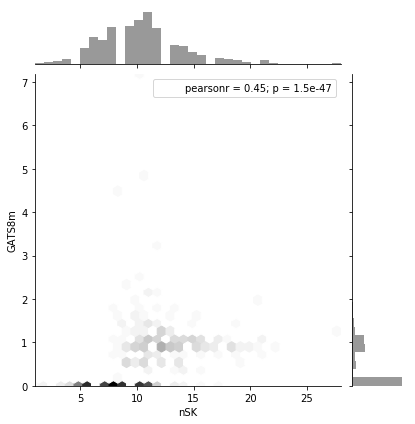

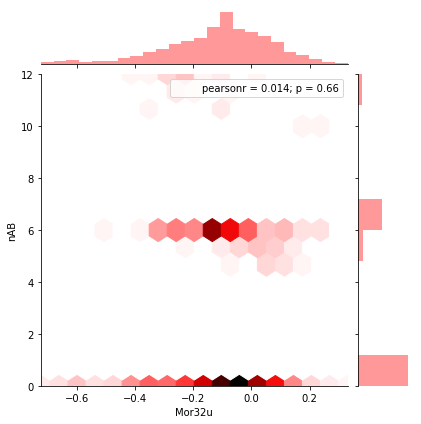

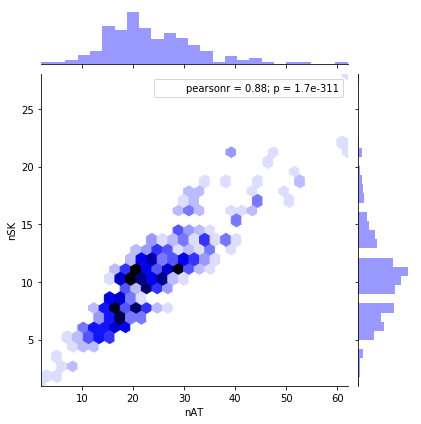

In [67]:
sb.jointplot(x=raw_data.iloc[:, 37], y=raw_data.iloc[:, 1006], kind="hex", color="k") 
sb.jointplot(x=raw_data.iloc[:, 2005], y=raw_data.iloc[:, 46], kind="hex", color="r") 
sb.jointplot(x=raw_data.iloc[:, 36], y=raw_data.iloc[:, 37], kind="hex", color="b") 

## The raw values for descriptive features are on vastly different scales

##  - with vastly different distributions
---

We can see that some descriptors are centered around 0 such as 'MATS7s'. Some have a centered distribution of data with significant outliers, such as 'AMW' which is also concentrated around 0. Some descriptors are more uniform in their distribution such as 'Mor23u' or 'Sv'.

There are two things to consider. We want the values on a standard scale. Standard scaler from sklearn scales our values to mean zero unit standard deviation. This approach squashes the data (in the presence of outliers) and I believe that this is hindering our results thus far.

Here we will first perform a transformation to deal with outliers and then scale to a standard scale.

In [68]:
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
df = pd.DataFrame(data=np.zeros_like(raw_data), columns=raw_data.columns)

In [69]:
median_impute = Imputer(missing_values='NaN', strategy='median')
x_no_missing = median_impute.fit_transform(raw_data.iloc[:, 35:])

In [70]:
ss = StandardScaler()
df.iloc[:, 35:] = ss.fit_transform(x_no_missing)

## Visualize transformation - `Standard Scaler()`

### NOTE: Ignore the warnings - for some reason the outside histogram will not build for these images

ValueError: color kwarg must have one color per dataset

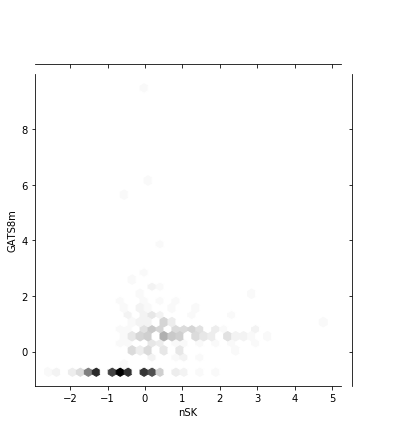

In [71]:
sb.jointplot(x=df.iloc[:, 37], y=df.iloc[:, 1006], kind="hex", color='k')

ValueError: color kwarg must have one color per dataset

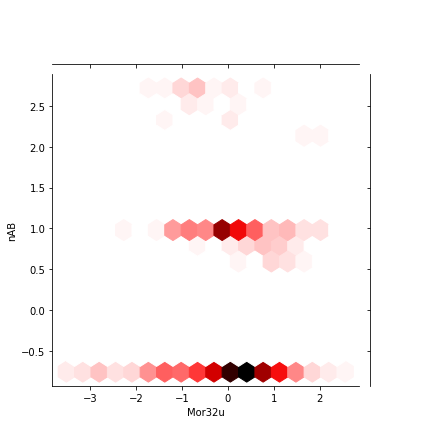

In [72]:
sb.jointplot(x=df.iloc[:, 2005], y=df.iloc[:, 46], kind="hex", color="r") 

ValueError: color kwarg must have one color per dataset

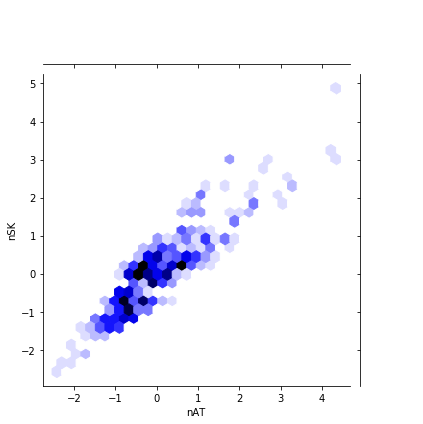

In [73]:
sb.jointplot(x=df.iloc[:, 36], y=df.iloc[:, 37], kind="hex", color="b") 

## Results of `Standard Scaler()`

I can't get rid of the error messages in the above output but the plots are correct and from them we can see the transformation in scale accross different descriptive features.

The scales are much closer but still we have outliers which cause squashed data near the new mean.

We can try a robust scaler and log/cuberoot transforms - to try to handle outliers a little better.

## `RobustScaler()`

In [74]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer

In [75]:
# Scaling - robust to outliers
robust = RobustScaler()
df.iloc[:, 35:] = robust.fit_transform(x_no_missing)

ValueError: color kwarg must have one color per dataset

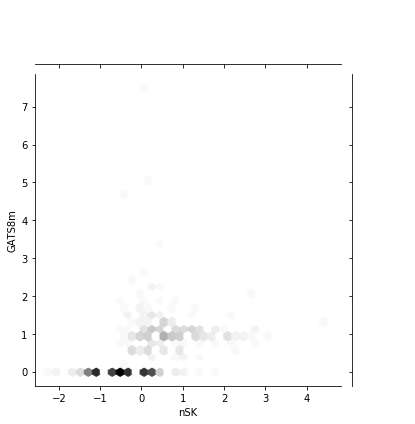

In [76]:
sb.jointplot(x=df.iloc[:, 37], y=df.iloc[:, 1006], kind="hex", color="k") 

ValueError: color kwarg must have one color per dataset

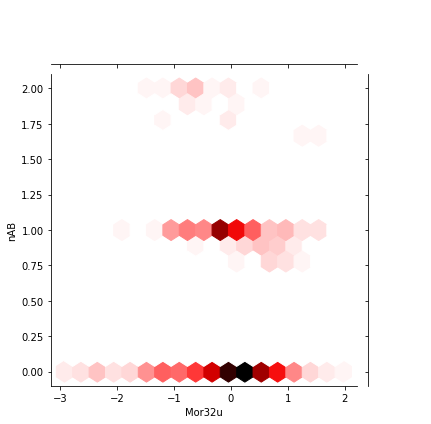

In [77]:
sb.jointplot(x=df.iloc[:, 2005], y=df.iloc[:, 46], kind="hex", color="r") 

ValueError: color kwarg must have one color per dataset

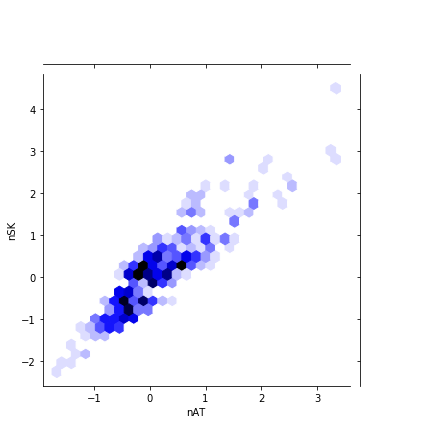

In [78]:
sb.jointplot(x=df.iloc[:, 36], y=df.iloc[:, 37], kind="hex", color="b") 

## Cube root transform then standardize
## `FunctionTransform(np.cbrt)`=> `StandardScaler()`

In [79]:
cbrt = FunctionTransformer(np.cbrt)
cbrt_values = cbrt.fit_transform(x_no_missing)
df.iloc[:, 35:] = ss.fit_transform(cbrt_values)

ValueError: color kwarg must have one color per dataset

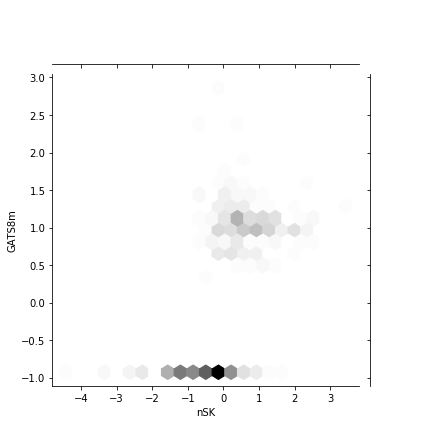

In [80]:
sb.jointplot(x=df.iloc[:, 37], y=df.iloc[:, 1006], kind="hex", color="k") 

ValueError: color kwarg must have one color per dataset

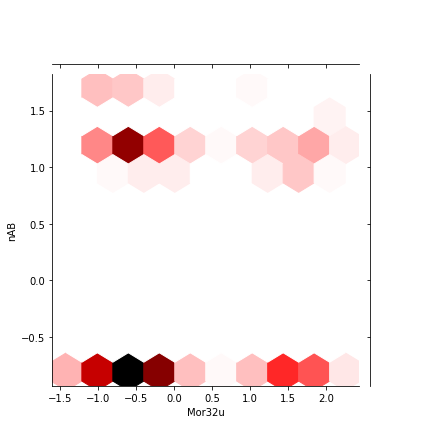

In [81]:
sb.jointplot(x=df.iloc[:, 2005], y=df.iloc[:, 46], kind="hex", color="r") 

ValueError: color kwarg must have one color per dataset

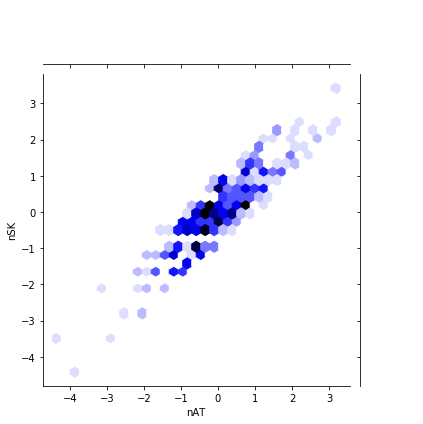

In [82]:
sb.jointplot(x=df.iloc[:, 36], y=df.iloc[:, 37], kind="hex", color="b") 

# Results

## Best Results

The most uniform scaling approach accross features appears to be to cube root transform the data then scale it to mean 0 and devide by the standard deviation.


This was the method used by the winning team for the population prediction sub-challenge.

The `RobustScaler()` also look promising so we can try this approach also.
